Лабораторная работа №1 (шкалы измерения)

Задание 1: Определение типа шкалы измерения

In [23]:
import pandas as pd
import numpy as np

data_1 = pd.read_csv('train.csv')
def scale_type(data : pd.DataFrame):
    scale_types = {}
    for name, data in data.items():
        if name == 'Survived':
            scale_types[name] = 'Номинальная'
        else:
            if data.dtype == object:
                scale_types[name] = 'Номинальная'
            elif data.dtype == np.int64 or data.dtype == np.float64:
                if sorted(data.unique()) == list(range(1, len(data.unique()) + 1)):
                    scale_types[name] = 'Порядковая'
                elif data.min() >= 0:
                    scale_types[name] = 'Отношений'
                else:
                    scale_types[name] = 'Интервальная'
    return scale_types
#print(scale_type(data_1))
scale_type(data_1)

{'PassengerId': 'Порядковая',
 'Survived': 'Номинальная',
 'Pclass': 'Порядковая',
 'Name': 'Номинальная',
 'Sex': 'Номинальная',
 'Age': 'Отношений',
 'SibSp': 'Отношений',
 'Parch': 'Отношений',
 'Ticket': 'Номинальная',
 'Fare': 'Отношений',
 'Cabin': 'Номинальная',
 'Embarked': 'Номинальная'}

Задание 2: Приведение данных к нужной шкале

In [19]:
new_data = data_1.copy()

print(data_1['Sex'].dtype)
print(data_1)
new_data['Sex'] = new_data['Sex'].map({'female': 1, 'male': 0})
print(new_data)
new_data['Sex'].dtype

object
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...

dtype('int64')

Задание 3: Анализ данных с использованием различных шкал измерения

In [15]:
def Analytics(data_1):
    res = {}

    res['Мода Пол'] = data_1['Sex'].mode()[0]
    res['Мода Выжившие'] = data_1['Survived'].mode()[0]

    res['Медиана Класс'] = data_1['Pclass'].median()
    
    res['Среднее значение Стоимость'] = data_1['Fare'].mean()
    res['Среднее значение Возраст'] = data_1['Age'].mean()
    
    return res

print(Analytics(data_1))

{'Мода Пол': 'male', 'Мода Выжившие': 0, 'Медиана Класс': 3.0, 'Среднее значение Стоимость': 32.204207968574636, 'Среднее значение Возраст': 29.69911764705882}


Задание 4: Визуализация данных в зависимости от шкалы измерения

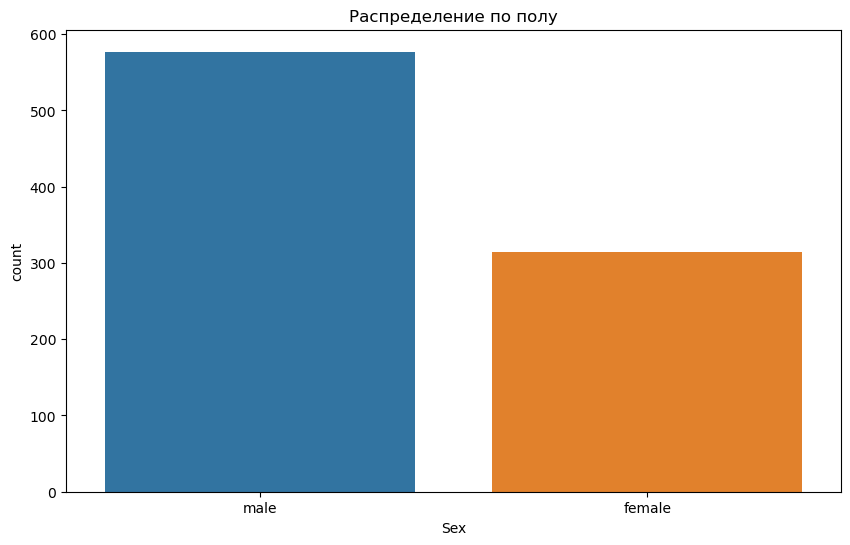

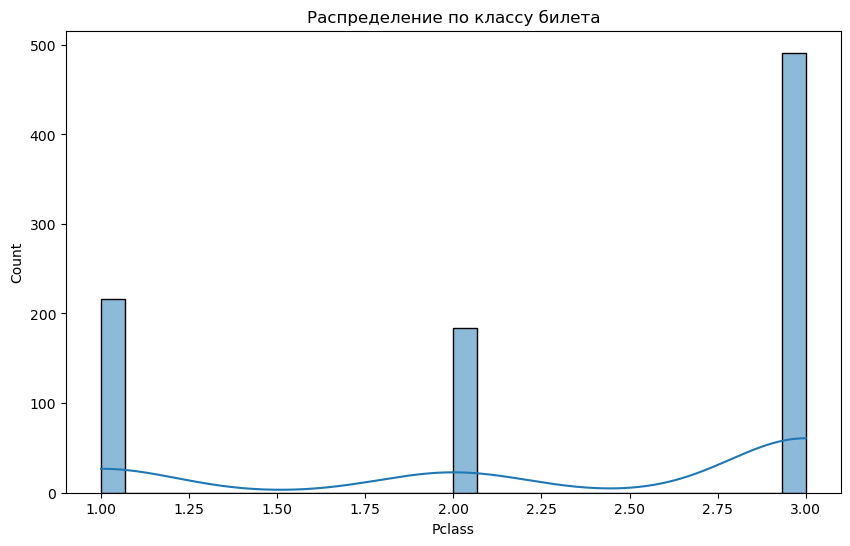

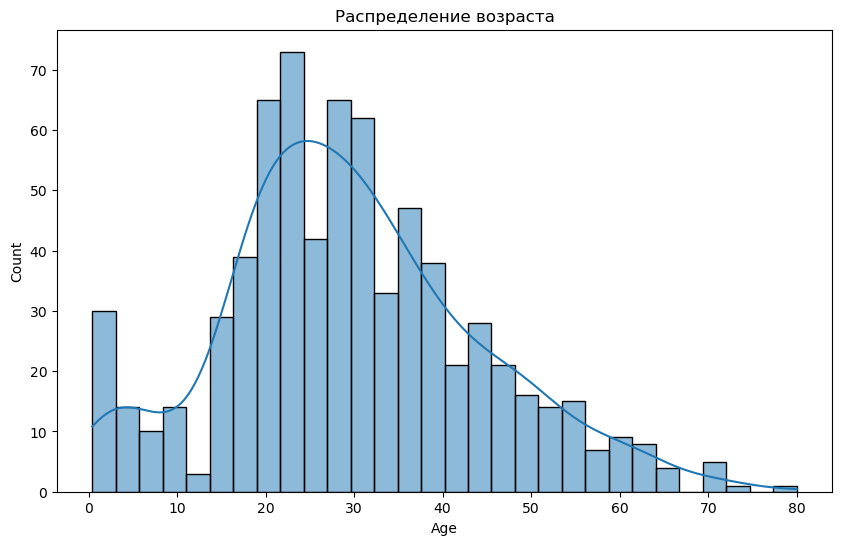

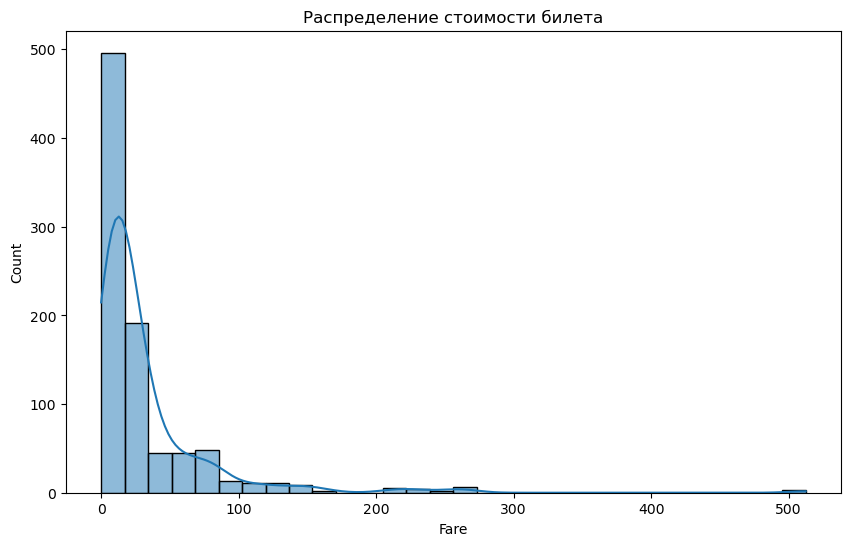

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.countplot(x='Sex', data=data_1)
plt.title('По полу')
plt.show()

plt.figure(figsize=(10, 6))
sb.histplot(data_1['Pclass'].dropna(), bins=30, kde=True)
plt.title('По классу билета')
plt.show()

plt.figure(figsize=(10, 6))
sb.histplot(data_1['Age'].dropna(), bins=30, kde=True)
plt.title('По возрасту')
plt.show()

plt.figure(figsize=(10, 6))
sb.histplot(data_1['Fare'].dropna(), bins=30, kde=True)
plt.title('По стоимости билета')
plt.show()

Задание 5: Проверка гипотез

T-статистика: -3.3466982429712298
P-значение: 0.0009068636053543751
Различия между рядами статистически значимы


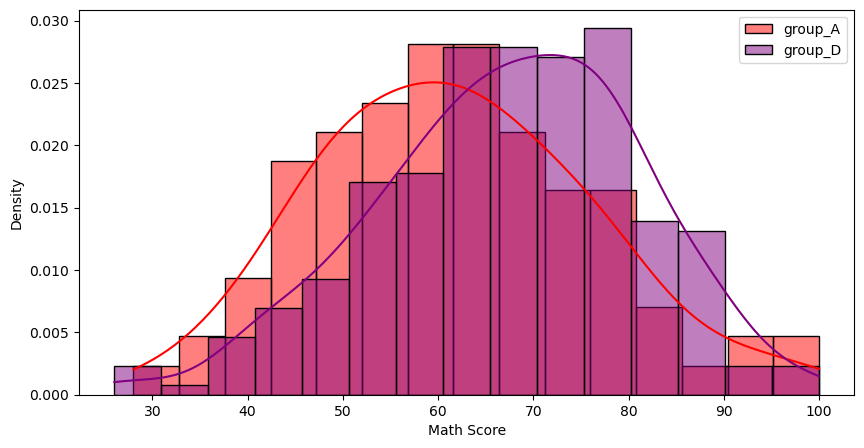

In [20]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data_5 = pd.read_csv('StudentsPerformance.csv')

group_A = data_5[data_5['race/ethnicity'] == 'group A']['math score']
group_D = data_5[data_5['race/ethnicity'] == 'group D']['math score']

t_result, p_result = stats.ttest_ind(group_A, group_D)

print(f"T-статистика: {t_result}")
print(f"P-значение: {p_result}")

if p_result < 0.05:
    print("Различия между рядами статистически значимы")
else:
    print("Нет статистически значимых различий между рядами")

plt.figure(figsize=(10, 5))
sb.histplot(group_A, color='red', label='group_A', kde=True, bins=15, stat="density")
sb.histplot(group_D, color='purple', label='group_D', kde=True, bins=15, stat="density")
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend()
plt.show()